In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_Recombined_user_counts(datasets,datasets_resample):
    """
    绘制多数据集用户轨迹数量分布对比图，通过三个并列子图展示不同数据集在原始和重采样后的用户轨迹数量分布差异

    参数：
    datasets：字典列表，每个字典包含两个键：'file_path'：原始数据集的文件路径（txt 格式）； 'title'：数据集名称
    datasets_resample：字典列表，结构与 datasets 一致，但 'file_path' 指向重采样后的数据集文件路径

    配色：
    color='#BEB8DC'
    color='#eb7765'
    """

    def plot_user_counts(ax, file_path, title):
        # 定义一个空字典，用于存储不同的userid及其对应的行数
        user_counts = {}
    
        # 打开txt文件进行读取
        with open(file_path, 'r') as file:
            # 逐行读取文件内容
            for line in file:
                # 根据空格或逗号等分隔符将每行内容拆分为字段
                fields = line.strip().split()  # 假设字段之间使用空格分隔，可根据实际情况修改分隔符
                # 获取userid
                userid = fields[0]
                # 如果userid已经在字典中，则将对应的计数加1；否则将userid加入字典，并将计数设为1
                user_counts[userid] = user_counts.get(userid, 0) + 1
    
        # 对字典按值进行排序，按count数从大到小排序
        sorted_user_counts = dict(sorted(user_counts.items(), key=lambda item: item[1], reverse=True))
    
        # 获取用户id和对应的计数
        user_ids = list(sorted_user_counts.keys())
        counts = list(sorted_user_counts.values())
    
        # ax.bar(range(len(sorted_user_counts)), counts, width=1)
        ax.bar(range(len(sorted_user_counts)), counts, width=1, label='Original Data', color='blue')
    
        # 设置Y轴刻度标签的字体大小为20
        ax.tick_params(axis='y', labelsize=20)
    
        # 取消x坐标的值
        ax.set_xticks([])
        # 添加标题和标签
        ax.set_title(title, fontsize=30)
        ax.set_ylabel('Nums', fontsize=25)
    
        # 添加标题和标签
        ax.set_title(title)
        ax.set_ylabel('Nums')
    
    def plot_user_ccounts_trajNumsounts(ax, file_path, title):
        user_counts = {}
        with open(file_path, 'r') as file:
            for line in file:
                fields = line.strip().split()
                userid = fields[0]
                user_counts[userid] = user_counts.get(userid, 0) + 1
    
        sorted_user_counts = dict(sorted(user_counts.items(), key=lambda item: item[1], reverse=True))
        user_ids = list(sorted_user_counts.keys())
        counts = list(sorted_user_counts.values())
    
        ax.bar(range(len(sorted_user_counts)), counts, width=1, label='Original Data',color='#BEB8DC',alpha=0.4)
    
        ax.tick_params(axis='y', labelsize=20)
        # ax.tick_params(axis='y', labelsize=20)
        # ax.set_xticks([])
        ax.set_title(title, fontsize=30)
        ax.set_ylabel('Number of Trajectories', fontsize=25)
        ax.set_xlabel('User Probability Density', fontsize=25)
    
    def resample_plot_user_counts(ax, file_path, title):
        user_counts = {}
        with open(file_path, 'r') as file:
            for line in file:
                fields = line.strip().split()
                userid = fields[0]
                user_counts[userid] = user_counts.get(userid, 0) + 1
    
        sorted_user_counts = dict(sorted(user_counts.items(), key=lambda item: item[1], reverse=True))
        user_ids = list(sorted_user_counts.keys())
        counts = list(sorted_user_counts.values())
    
        ax.bar(range(len(sorted_user_counts)), counts, width=1, label='Resampled Data', color='#eb7765',alpha=0.5)
    
        ax.tick_params(axis='y', labelsize=20)
        ax.set_xticks([])
        ax.set_title(title, fontsize=30)
        ax.set_ylabel('Number of Trajectories', fontsize=25)
    
    
    
    # 设置全局字体大小
    plt.rcParams.update({'font.size': 30})
    
    # 创建一个包含三个子图的布局
    fig, axs = plt.subplots(1, 3, figsize=(24, 6))
    
    # 循环遍历数据集并绘制柱状图
    for i, dataset in enumerate(datasets):
        plot_user_counts(axs[i], dataset['file_path'], dataset['title'])
    for i, dataset in enumerate(datasets_resample):
        resample_plot_user_counts(axs[i], dataset['file_path'], dataset['title'])
    
    # 手动添加三个颜色的图例
    handles = [
        plt.Line2D([0], [0], color='#BEB8DC', lw=4, label='Original Data'),
        plt.Line2D([0], [0], color='#eb7765', lw=4, label='Resampled Data'),
        # plt.Line2D([0], [0], color=(0, 0.4, 0.6), lw=4, label='Overlapped Data')
    ]
    
    # 在每个子图上分别添加图例
    for ax in axs:
        ax.legend(handles=handles, loc='upper right', fontsize=20)
    
    # 调整子图布局
    plt.tight_layout()
    
    # 保存图形
    plt.savefig('Recombined_user_counts.pdf', format='pdf')
    
    # 显示图形
    plt.show()



In [ ]:
#示例
# 定义数据集信息
datasets = [
    {'file_path': 'Foursquare.txt', 'title': 'Foursquare '},
    {'file_path': 'Gowalla.txt', 'title': 'Gowalla '},
    {'file_path': 'Brightkite.txt', 'title': 'Brightkite '}

]

datasets_resample = [
    {'file_path': 'resample_Foursquare.txt', 'title': 'Foursquare '},
    {'file_path': 'resample_Gowalla.txt', 'title': 'Gowalla '},
    {'file_path': 'resample_Brightkite.txt', 'title': 'Brightkite '}

]

plot_Recombined_user_counts(datasets,datasets_resample)

In [3]:
'''
    以下是为呈现画图效果和适应编造数据的改版
'''
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_Recombined_user_counts(foursquare_original,gowalla_original,brightkite_original,foursquare_resampled,gowalla_resampled,brightkite_resampled):
    def plot_user_counts(ax, user_counts, title):
        sorted_user_counts = dict(sorted(user_counts.items(), key=lambda item: item[1], reverse=True))
        counts = list(sorted_user_counts.values())
        ax.bar(range(len(sorted_user_counts)), counts, width=1, label='Original Data', color='blue')
        ax.tick_params(axis='y', labelsize=20)
        ax.set_xticks([])
        ax.set_title(title, fontsize=30)
        ax.set_ylabel('Nums', fontsize=25)
    
    def plot_user_ccounts_trajNumsounts(ax, file_path, title):
        user_counts = {}
        with open(file_path, 'r') as file:
            for line in file:
                fields = line.strip().split()
                userid = fields[0]
                user_counts[userid] = user_counts.get(userid, 0) + 1
    
        sorted_user_counts = dict(sorted(user_counts.items(), key=lambda item: item[1], reverse=True))
        user_ids = list(sorted_user_counts.keys())
        counts = list(sorted_user_counts.values())
    
        ax.bar(range(len(sorted_user_counts)), counts, width=1, label='Original Data',color='#BEB8DC',alpha=0.4)
    
        ax.tick_params(axis='y', labelsize=20)
        # ax.tick_params(axis='y', labelsize=20)
        # ax.set_xticks([])
        ax.set_title(title, fontsize=30)
        ax.set_ylabel('Number of Trajectories', fontsize=25)
        ax.set_xlabel('User Probability Density', fontsize=25)
    
    def resample_plot_user_counts(ax, user_counts, title):
        sorted_user_counts = dict(sorted(user_counts.items(), key=lambda item: item[1], reverse=True))
        counts = list(sorted_user_counts.values())
        ax.bar(range(len(sorted_user_counts)), counts, width=1, label='Resampled Data', color='#eb7765', alpha=0.5)
        ax.tick_params(axis='y', labelsize=20)
        ax.set_xticks([])
        ax.set_title(title, fontsize=30)
        ax.set_ylabel('Number of Trajectories', fontsize=25)
    
    # 定义数据集（使用编造的数据）
    datasets_original = [
        {'data': foursquare_original, 'title': 'Foursquare'},
        {'data': gowalla_original, 'title': 'Gowalla'},
        {'data': brightkite_original, 'title': 'Brightkite'}
    ]
    
    datasets_resampled = [
        {'data': foursquare_resampled, 'title': 'Foursquare'},
        {'data': gowalla_resampled, 'title': 'Gowalla'},
        {'data': brightkite_resampled, 'title': 'Brightkite'}
    ]
    
    # 设置全局字体大小
    plt.rcParams.update({'font.size': 30})
    
    # 绘图
    fig, axs = plt.subplots(1, 3, figsize=(24, 6))
    for i, dataset in enumerate(datasets_original):
        plot_user_counts(axs[i], dataset['data'], dataset['title'])
    for i, dataset in enumerate(datasets_resampled):
        resample_plot_user_counts(axs[i], dataset['data'], dataset['title'])
    
    # 添加图例等（保持不变）
    handles = [
        plt.Line2D([0], [0], color='blue', lw=4, label='Original Data'),
        plt.Line2D([0], [0], color='#eb7765', lw=4, label='Resampled Data')
    ]
    for ax in axs:
        ax.legend(handles=handles, loc='upper right', fontsize=20)
    
    plt.tight_layout()
    plt.savefig('Recombined_user_counts.pdf', format='pdf')
    plt.show()

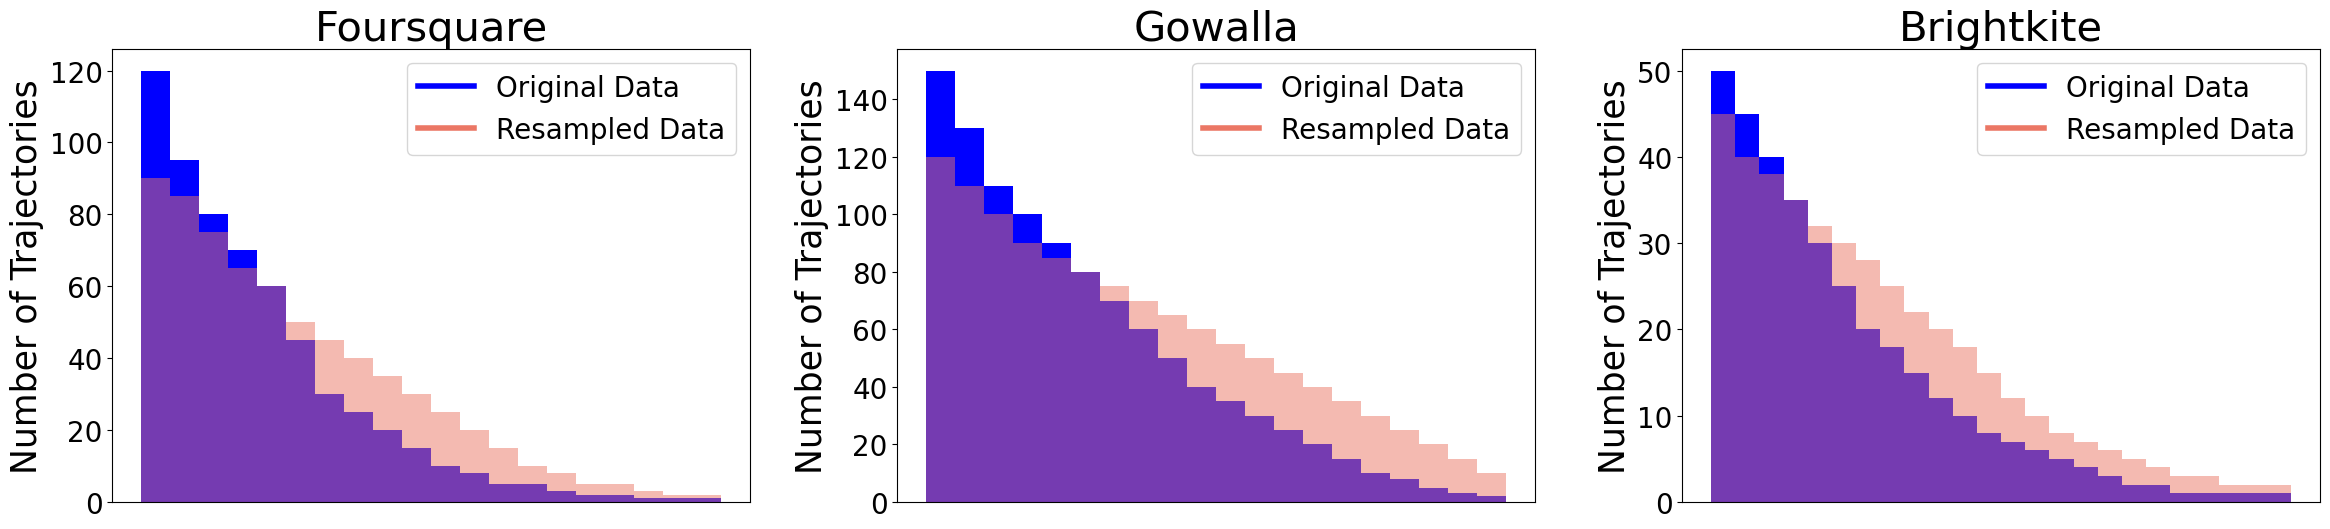

In [4]:
# 1. 原始数据集的用户轨迹数量（user_id: 轨迹数）
# Foursquare数据集：少量活跃用户（高轨迹数）+ 大量普通用户
foursquare_original = {
    'u1': 120, 'u2': 95, 'u3': 80, 'u4': 70, 'u5': 60,
    'u6': 45, 'u7': 30, 'u8': 25, 'u9': 20, 'u10': 15,
    'u11': 10, 'u12': 8, 'u13': 5, 'u14': 5, 'u15': 3,
    'u16': 2, 'u17': 2, 'u18': 1, 'u19': 1, 'u20': 1
}

# Gowalla数据集：用户轨迹数整体偏高，活跃用户更多
gowalla_original = {
    'v1': 150, 'v2': 130, 'v3': 110, 'v4': 100, 'v5': 90,
    'v6': 80, 'v7': 70, 'v8': 60, 'v9': 50, 'v10': 40,
    'v11': 35, 'v12': 30, 'v13': 25, 'v14': 20, 'v15': 15,
    'v16': 10, 'v17': 8, 'v18': 5, 'v19': 3, 'v20': 2
}

# Brightkite数据集：用户轨迹数整体偏低，分布更分散
brightkite_original = {
    'w1': 50, 'w2': 45, 'w3': 40, 'w4': 35, 'w5': 30,
    'w6': 25, 'w7': 20, 'w8': 18, 'w9': 15, 'w10': 12,
    'w11': 10, 'w12': 8, 'w13': 7, 'w14': 6, 'w15': 5,
    'w16': 4, 'w17': 3, 'w18': 2, 'w19': 2, 'w20': 1,
    'w21': 1, 'w22': 1, 'w23': 1, 'w24': 1
}

# 2. 重采样后的用户轨迹数量（降低活跃用户的轨迹数，提升低轨迹用户的数量，使分布更均衡）
foursquare_resampled = {
    'u1': 90, 'u2': 85, 'u3': 75, 'u4': 65, 'u5': 60,
    'u6': 50, 'u7': 45, 'u8': 40, 'u9': 35, 'u10': 30,
    'u11': 25, 'u12': 20, 'u13': 15, 'u14': 10, 'u15': 8,
    'u16': 5, 'u17': 5, 'u18': 3, 'u19': 2, 'u20': 2
}

gowalla_resampled = {
    'v1': 120, 'v2': 110, 'v3': 100, 'v4': 90, 'v5': 85,
    'v6': 80, 'v7': 75, 'v8': 70, 'v9': 65, 'v10': 60,
    'v11': 55, 'v12': 50, 'v13': 45, 'v14': 40, 'v15': 35,
    'v16': 30, 'v17': 25, 'v18': 20, 'v19': 15, 'v20': 10
}

brightkite_resampled = {
    'w1': 45, 'w2': 40, 'w3': 38, 'w4': 35, 'w5': 32,
    'w6': 30, 'w7': 28, 'w8': 25, 'w9': 22, 'w10': 20,
    'w11': 18, 'w12': 15, 'w13': 12, 'w14': 10, 'w15': 8,
    'w16': 7, 'w17': 6, 'w18': 5, 'w19': 4, 'w20': 3,
    'w21': 3, 'w22': 2, 'w23': 2, 'w24': 2
}

plot_Recombined_user_counts(foursquare_original,gowalla_original,brightkite_original,foursquare_resampled,gowalla_resampled,brightkite_resampled)